In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# FINAL MODEL USED: XGBoost


!pip install xgboost

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Load train and test sets
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")






# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Train shape: (1460, 81)
Test shape: (1459, 80)


This notebook uses XGBoost for the final prediction and submission. After comparing three models (Linear Regression, Random Forest, and XGBoost), I selected XGBoost based on lowest RMSE.

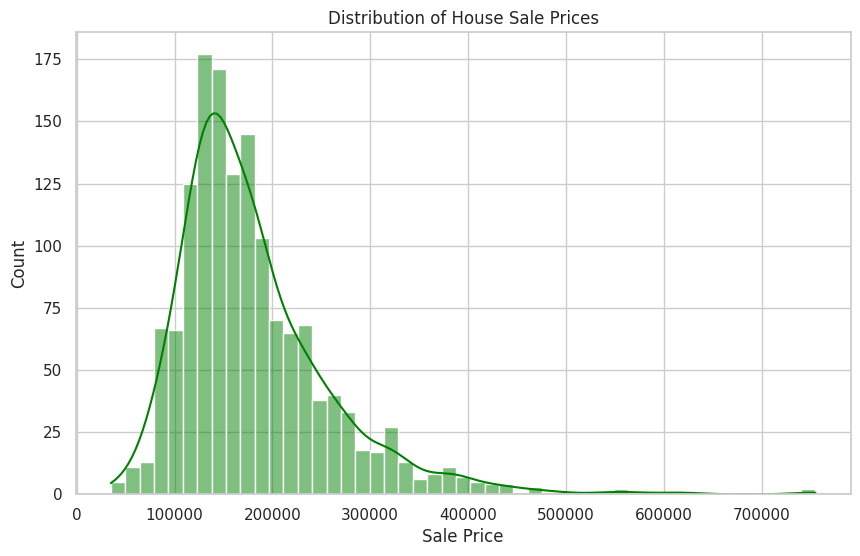

In [2]:
# Visualize target distribution
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, color='green')
plt.title("Distribution of House Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.show()


In [3]:
from sklearn.impute import SimpleImputer

# Define features
features = ['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'YearBuilt']

# Create the imputer using median strategy
imputer = SimpleImputer(strategy='median')

# Fit on training data and transform both train and test
X = imputer.fit_transform(train[features])
X_test = imputer.transform(test[features])

# Define the target as before
y = train['SalePrice']



In [4]:
# Train the model
model = LinearRegression()
model.fit(X, y)

# Show coefficients
print("Model trained!\nFeature weights:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.2f}")


Model trained!
Feature weights:
GrLivArea: 50.83
OverallQual: 20391.14
TotalBsmtSF: 29.98
GarageCars: 14510.00
YearBuilt: 301.43


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import numpy as np

# Split training data for validation
X_train_split, X_valid, y_train_split, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_split, y_train_split)
lr_preds = lr_model.predict(X_valid)
lr_rmse = np.sqrt(mean_squared_error(y_valid, lr_preds))

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_split, y_train_split)
rf_preds = rf_model.predict(X_valid)
rf_rmse = np.sqrt(mean_squared_error(y_valid, rf_preds))

# XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_split, y_train_split)
xgb_preds = xgb_model.predict(X_valid)
xgb_rmse = np.sqrt(mean_squared_error(y_valid, xgb_preds))

# Comparison Table
print("\n🔍 Model Comparison (RMSE - Lower is Better)")
print("Linear Regression RMSE:", round(lr_rmse, 2))
print("Random Forest RMSE:    ", round(rf_rmse, 2))
print("XGBoost RMSE:          ", round(xgb_rmse, 2))



🔍 Model Comparison (RMSE - Lower is Better)
Linear Regression RMSE: 39763.3
Random Forest RMSE:     28887.96
XGBoost RMSE:           28174.66


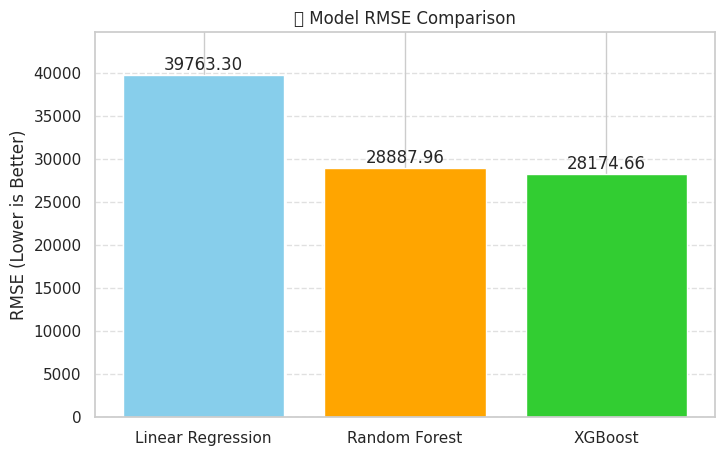

In [6]:
import matplotlib.pyplot as plt

# Models and their RMSE scores
models = ['Linear Regression', 'Random Forest', 'XGBoost']
rmse_scores = [lr_rmse, rf_rmse, xgb_rmse]

# Create bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(models, rmse_scores, color=['skyblue', 'orange', 'limegreen'])
plt.title('🔍 Model RMSE Comparison')
plt.ylabel('RMSE (Lower is Better)')
plt.ylim(0, max(rmse_scores) + 5000)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 200, f'{height:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


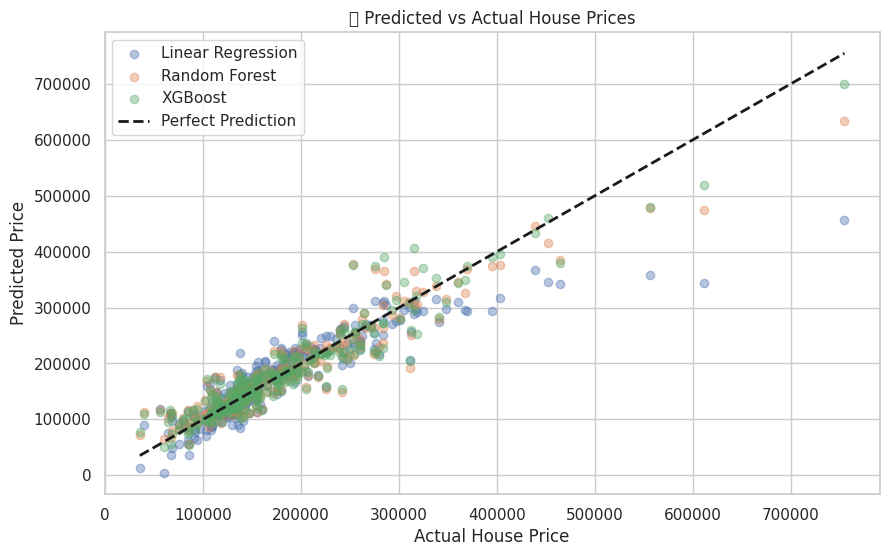

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_valid, lr_preds, label="Linear Regression", alpha=0.4)
plt.scatter(y_valid, rf_preds, label="Random Forest", alpha=0.4)
plt.scatter(y_valid, xgb_preds, label="XGBoost", alpha=0.4)

plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], 'k--', lw=2, label="Perfect Prediction")

plt.xlabel("Actual House Price")
plt.ylabel("Predicted Price")
plt.title("📉 Predicted vs Actual House Prices")
plt.legend()
plt.show()


In [8]:
# Prepare test features and handle missing values
X_test = test[features].fillna(0)  # Or use the same imputation method you used earlier

# ✅ Predict sale prices using XGBoost (best model)
predictions = xgb_model.predict(X_test)

# Create submission file
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': predictions
})

submission.to_csv('submission.csv', index=False)
print("✅ Submission file created successfully using XGBoost!")



✅ Submission file created successfully using XGBoost!


In [9]:
# Show clean table of predictions
prediction_table = pd.DataFrame({
    'Id': test['Id'],
    'Predicted SalePrice': predictions
})

print("\n🏡 Sample Predictions:")
print(prediction_table.head(20).to_string(index=False))  # Or .tail(), or full list



🏡 Sample Predictions:
  Id  Predicted SalePrice
1461        122785.445312
1462        154394.312500
1463        159429.312500
1464        179946.875000
1465        220481.140625
1466        179715.921875
1467        169087.484375
1468        173724.406250
1469        185322.765625
1470        113707.093750
1471        189797.250000
1472         95925.812500
1473         99714.453125
1474        162274.703125
1475        143390.484375
1476        444876.375000
1477        265482.062500
1478        319011.281250
1479        295999.718750
1480        351781.468750
